# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Schweisiyana Salmah
- **Email:** yanasalmah17@gmail.com
- **ID Dicoding:** 	MC229D5X0831

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana perbandingan penyewa terdaftar dan penyewa *casual* pada hari kerja dan *weekend/holiday*?
- Pertanyaan 2 : Bagaimana pengaruh *season* atau musim pada jumlah sepeda yang disewa?
- Pertanyaan 3 : Pada pukul berapa penyewaan sepeda terbanyak? Bagaimana perbandingan dari tahun 2011 ke 2012?

## Import Semua Packages/Library yang Digunakan

Mengimport library yang diperlukan untuk proses analisis data
- pandas dan numpy untuk melakukan perhitungan numerik
- matplotlib dan seaborn untuk visualisasi data


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling


### Gathering Data

- drive.mount untuk menautkan google drive ke google collab sehingga bisa mengambil data pada google drive

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- menuliskan `file_path` atau lokasi dari data yang akan digunakan
- membuat dataframe dengan nama `hour_df` dengan mengambil data pada file `hour.csv`
- sintaks `.head()` untuk melihat dataframe hour_df dengan menampilkan 5 baris data

In [8]:
file_path = "/content/drive/My Drive/Bike-sharing-dataset/day.csv"
day_df = pd.read_csv(file_path)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- menuliskan `file_path` atau lokasi dari data yang akan digunakan
- membuat dataframe dengan nama `hour_df` dengan mengambil data pada file `hour.csv` menggunakan `pandas`
- sintaks `.head()` untuk menampilkan beberapa baris untuk melihat struktur data

In [9]:

#hal yang sama seperti langkah diatas untuk data hour.csv
file_path = "/content/drive/My Drive/Bike-sharing-dataset/hour.csv"
hour_df = pd.read_csv(file_path)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

- `.info()` untuk menampilkan informasi mengenai nama-nama kolom, missing data, dan tipe data pada `day.csv`

In [10]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Tipe data `dteday` sebaiknya `dateTime` bukan `object`
- Tidak ditemukan data yang hilang
- tipe data pada `season` sebaiknya `string`


- `.describe()` digunakan untuk menampilkan statistika deskriptif dari data `day.csv`

In [11]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight**
- tidak ditemukan anomali pada data

- `.info()` untuk menampilkan informasi mengenai nama-nama kolom, missing data, dan tipe data pada hour.csv

In [12]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight**
- Tipe data pada "dteday" sebaiknya datetime

- menampilkan statistika deskriptif data hour.csv

In [13]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight**
- tidak terdapat anomali pada data

In [14]:
#memberikan output tentang duplikasi data yang ada di hour.csv dan day.csv
print("Jumlah duplikasi : ", hour_df.duplicated().sum())
print("Jumlah duplikasi : ", day_df.duplicated().sum())

Jumlah duplikasi :  0
Jumlah duplikasi :  0


**Insight**
- tidak ada duplikasi data pada dataset

### Cleaning Data

- mengubah tipe data pada kolom tanggal `dteday` dari `object` menjadi `dateTime` di day.csv dan hour.csv menggunakan `pandas`

In [15]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
  hour_df[column] = pd.to_datetime(hour_df[column])

- `.rename` untuk mengubah nama kolom dari `cnt` menjadi `total_rental`
- `inplace=True` untuk langsung memasukan perubahan ke datanya

In [16]:
hour_df.rename(columns={"cnt": "total_rental"}, inplace=True)
day_df.rename(columns={"cnt": "total_rental"}, inplace=True)

`.apply` untuk mengonversi nilai numerik dalam kolom season menjadi kategori musiman yang mudah dipahami
- `1` : springer
- `2` : summer
- `3` : fall
- `4` : winter


In [17]:
day_df['season'] = day_df['season'].apply(lambda x: 'springer' if x == 1 else ('summer' if x == 2 else ('fall' if x == 3 else 'winter')))
hour_df['season'] = hour_df['season'].apply(lambda x: 'springer' if x == 1 else ('summer' if x == 2 else ('fall' if x == 3 else 'winter')))


mengonversi nilai numerik pada kolom r menjadi kategori tahun yang lebih jelas menggunakan `.apply`
- `0` : 2011
- `1` : 2012

In [18]:
day_df['yr'] = day_df['yr'].apply(lambda x: 2011 if x == 0 else (2012))
hour_df['yr'] = hour_df['yr'].apply(lambda x: 2011 if x == 0 else (2012))

- `.head()` menampilkan beberapa baris data sehinga bisa melihat perubahan yang telah dilakukan sebelumnya pada dataset

In [19]:
day_df.head()
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_rental
0,1,2011-01-01,springer,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore ...

## Mengelompokkan Data Berdasarkan Hari Kerja (Working Day)
Dilakukan pengelompokkan data berdasarkan **workingday**, yaitu:
- `0` = Hari libur (bukan hari kerja)
- `1` = Hari kerja

Kemudian menjumlahkan total penyewaan sepeda (`total_rental`) untuk setiap kategori.  
Untuk melihat jumlah penyewaan sepeda lebih banyak pada hari kerja atau hari libur.


In [20]:
#melakukan pivot yang dipilih berdasarkan workingday dengan menampilkan jumlah total rental
day_df.groupby(by="workingday")["total_rental"].sum()

,total_rental
workingday,
0,1000269
1,2292410


**Insight**
- Pada hari kerja total rental sepeda lebih banyak dibandingkan weekend dan/atau holiday

### Mengelompokkan Data Berdasarkan Musim (season)
menjumlahkan total penyewaan sepeda (`total_rental`) untuk setiap kategori.  
untuk mengetahui jumlah penyewaan sepeda lebih banyak pada musim apa.


In [21]:
day_df.groupby(by="season").agg({
    "total_rental": "sum"}).sort_values(by="total_rental", ascending=False)

,total_rental
season,
fall,1061129
summer,918589
winter,841613
springer,471348


**Insight:**
- Diperoleh bahwa perentalan sepeda terbanyak pada musim gugur, kemudian diikuti musim panas, dingin dan semakin menurun pada musim semi.

## Menghitung total perentalan sepeda pada tiap tahun (`2011` dan `2012`)
- Membuat pivot dengan `.groupby` berdasarkan tahun (`yr`)
- menjumlahkan (`total_rental`) dengan `.sum()`

In [22]:
day_df.groupby(by="yr")["total_rental"].sum()

,total_rental
yr,
2011,1243103
2012,2049576


**Insight**
- total penyewaan sepeda pda tahun 2012 meningkat

## Melihat pola penyewaan sepeda pada musim tertentu di tahun 2011 dan 2012
- membuat pivot data berdasarkan tahun (`yr`) dan musim(`season`) dengan .`groupby`
- menjumlahkan (`total_rental`) dengan .`sum()`

In [23]:
rental_per_season = day_df.groupby(['yr', 'season'])['total_rental'].sum()
rental_per_season


yr    season  
2011  fall        419650
      springer    150000
      summer      347316
      winter      326137
2012  fall        641479
      springer    321348
      summer      571273
      winter      515476
Name: total_rental, dtype: int64

**Insight**
- pola total rental sepeda per musim pada tahun 2011 dan 2012 sama yaitu orang orang lebih banyak rental sepeda pada musim gugur daripada musim semi dan musim panas.
- musim dingin menjadi musim paling jarang orang orang menyewa sepeda

## Menghitung total perentalan pada cuaca tertentu
- Membuat pivot dengan `.groupby` berdasarkan tahun (`yr`) dan `weathersit`
- Menjumlahkan (`total_rental`) dangan `.sum()`

In [24]:
day_df.groupby(['yr','weathersit'])["total_rental"].sum()

yr    weathersit
2011  1              835067
      2              382924
      3               25112
2012  1             1422885
      2              613934
      3               12757
Name: total_rental, dtype: int64

## Melihat korelasi antara kelembaban (`hum`) dan jumlah penyewaan sepeda (`total_rental`)
- Membuat variabel `corhum` untuk menyimpan nilai koefisien korelasi
- Mencari koefisien korelasi dengan `.corr`
- Menampilkan koefisien korelasi dengan perintah `print` dengan memanggil variabel `corhum`
- Pengkondisian keluaran
    - 0 < `corhum` < 1 :  "Korelasi bersesuaian"

    - `corhum`== 0 : "Tidak ada korelasi"
    - `corhum` < 0 : "Korelasi berlawanan"



In [25]:
corhum=day_df['hum'].corr(day_df['total_rental'])
print(f"Koefisien korelasi antara kelembapan dan jumlah sewa sepeda : {corhum}")

if 0 < corhum < 1 :
  print("Korelasi bersesuaian")
elif corhum == 0 :
  print("Tidak ada korelasi")
else :
  print("Korelasi berlawanan")

Koefisien korelasi antara kelembapan dan jumlah sewa sepeda : -0.1006585621371552
Korelasi berlawanan


**Insight**
- tidak ada korelasi atau korelasi antara kelembapan dan total rental berlawanan

## Melihat korelasi antara kecepatan angin dan jumlah penyewaan sepeda
- Membuat variabel `corwrind`
- Menyimpan nilai koefisien korelasi ke dalam variabel `corwind`
- Mencari koefisien korelasi dengan `.corr`
- Menampilkan koefisien korelasi dengan perintah `print` dengan memanggil variabel `corhum`

In [26]:
corrwind=day_df['windspeed'].corr(day_df['total_rental'])
print(f"Koefisien korelasi antara kecepatan angin dan jumlah sewa  : {corrwind}")

Koefisien korelasi antara kecepatan angin dan jumlah sewa  : -0.23454499742166993


**Insight**
- tidak ada korelasi antara kecepatan angin dan jumlah sewa

## Melihat pola penyewaan sepeda berdasarkan jam
- Membuat pivot dengan `.groupby` berdasarkan tahun (`yr`) dan jam (`hr`)
- Menghitung (`total_rental`) dengan `.sum()`

In [27]:
hour_df.groupby(["yr",'hr'])["total_rental"].sum()

yr    hr
2011  0      15540
      1       9558
      2       6661
      3       3441
      4       1817
      5       5157
      6      20801
      7      56930
      8      95467
      9      59486
      10     47511
      11     56598
      12     69198
      13     69339
      14     66482
      15     68590
      16     85622
      17    127632
      18    116985
      19     85802
      20     62818
      21     48875
      22     37677
      23     25116
2012  0      23590
      1      14606
      2       9691
      3       4733
      4       2611
      5       9104
      6      34331
      7      97241
      8     165534
      9      99952
      10     78746
      11     94722
      12    115216
      13    115580
      14    109170
      15    114559
      16    142126
      17    209228
      18    192787
      19    140987
      20    101732
      21     76570
      22     57935
      23     38825
Name: total_rental, dtype: int64

**Insight**
- Penyewaan sepeda terbanyak terjadi pada pukul 17.00 baik pada tahun 2011 ataupun 2012

## Melihat rasio jumlah penyewa `casual` dan penyewa `registered`
- Membuat variabel 'rasio_casual_registered' untuk menyimpan rasio penyewa terdaftar dan tidak terdaftar.
- Menghitung rasio dengan rumus : jumlah penyewa `casual` / jumlah penyewa `registered`


In [28]:
day_df["rasio_casual_registered"]=day_df["casual"]/day_df["registered"]
hour_df["rasio_casual_registered"]=hour_df["casual"]/hour_df["registered"]

In [29]:
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_rental,rasio_casual_registered
0,1,2011-01-01,springer,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,0.230769
1,2,2011-01-01,springer,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,0.250000
2,3,2011-01-01,springer,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,0.185185
3,4,2011-01-01,springer,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,0.300000
4,5,2011-01-01,springer,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,springer,2012,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,0.101852
17375,17376,2012-12-31,springer,2012,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,0.098765
17376,17377,2012-12-31,springer,2012,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,0.084337
17377,17378,2012-12-31,springer,2012,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,0.270833


**Insight**
- Kolom rasio yang dibuat sebelumnya telah masuk kedalam dataset sesuai yang diinginkan

## Melihat statistika deskriptif dari rasio penyewa casual dan penyewa terdaftar
- Menggunakan `.describe()` untuk melihat statitika dekriptif dari `rasio_casual_registered`

In [30]:
day_df["rasio_casual_registered"].describe()

,rasio_casual_registered
count,731.000000
mean,0.237520
std,0.191081
min,0.013353
25%,0.110274
50%,0.174790
75%,0.273569
max,1.042166


**Insight**
- Rata-rata rasio = 0,2 yang berarti penyewa `casual` masih lebih rendah dari penyewa `registered`
- Rasio tertingga adalah 1,04 berarti pada suatu hari jumlah penyewa `casual` pernah lebih dari penyewa `registered`

## Melihat rata rata rasio penyewa sepeda terdaftar dan tidak terdaftar
- Membuat pivot berdasarkan hari kerja (`workingday`)
- Menghitung rata rata `rasio_casual_registered` menggunakan `.mean()`

In [31]:
day_df.groupby(by="workingday")["rasio_casual_registered"].mean()

,rasio_casual_registered
workingday,
0,0.439501
1,0.144205


**Insight**
- pada *weekend* atau *holiday* penyewa *casual* bertambah daripada saat *weekday*, walaupun pengguna *registered* tetap lebih banyak.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana rata rata perbandingan penyewa terdaftar dan penyewa casual pada hari kerja dan weekend/holiday?

##### Memvisualisasikan perbandingan casual dan registered berdasarkan workingday
- Membuat pivot berdasarkan `workingday` dengan `.groupby`
- Menghitung rata-rata dari `casual` dan `registered` dengan `.mean()`
- Menyimpan hasil pivot ke variabel `byworkingday_comparison_df`
- Membuat bar chart dengan `plt`
- Judul chart : " Rata-rata Penyewa Casual VS Registered"
- Label y : "Rata rata Penyewa"
- Label x : "Working day ( `0` : No, `1` : Yes)"
- Legend `Tipe Penyewa` untuk memberi keterangan warna bar




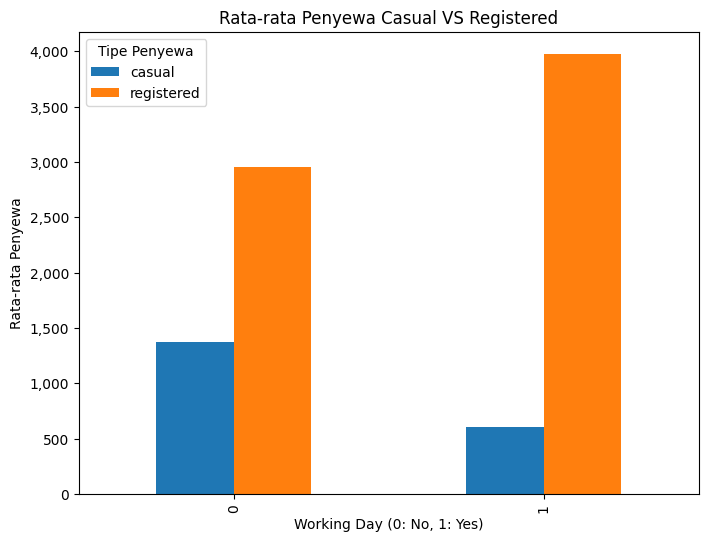

In [32]:
byworkingday_comparison_df = day_df.groupby('workingday')[['casual', 'registered']].mean()
byworkingday_comparison_df.plot(kind='bar', figsize=(8, 6))
plt.title('Rata-rata Penyewa Casual VS Registered')
plt.xlabel('Working Day (0: No, 1: Yes)')
plt.ylabel('Rata-rata Penyewa')
plt.legend(title='Tipe Penyewa')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.show()


**Insight**
- rata-rata pengguna terdaftar pada weekend lebih sedikit daripada weekday
- sementara rata-rata pengguna casual lebih banyak saat weekend/holiday daripada saat weekday yang mengalami penurunan

### Pertanyaan 2: Bagaimana pengaruh musim pada penyewaan sepeda?

#### Memvisualisasikan jumlah sewa (`total_rental`) pada tiap musim (`season`)
- `day_df.groupby(by="season")`: Mengelompokkan data berdasarkan kolom season.
- `"total_rental".sum()`: Menjumlahkan total rental untuk setiap musim.

- `.reset_index()` : Mengatur ulang indeks agar hasilnya berupa DataFrame yang rapi.
- `plt.figure(figsize=(8, 6))`: Mengatur ukuran figur menjadi 8x6 inci agar lebih proporsional.
- Warna `#1f77b4` (sky blue) digunakan untuk menyorot musim dengan jumlah sewa tertinggi.
- Warna `#D3D3D3` (light gray) digunakan untuk musim lainnya.
- `plt.bar(x="season", height="total_rental", data=...)` : Membuat diagram batang dengan sumbu-x sebagai season dan tinggi batang sebagai total_rental.
- `byseason_df.sort_values(by="total_rental", ascending=False)`: Mengurutkan data berdasarkan total_rental dari yang terbesar ke terkecil.
- `color=color_palette` : Menggunakan palet warna yang telah ditentukan.
- `plt.xlabel("Season")`: Memberikan label untuk sumbu-x.
- `plt.ylabel("Total Rental")` : Memberikan label untuk sumbu-y.
- `plt.title("Total Rental by Season")` : Memberikan judul untuk visualisasi.
- `plt.gca().yaxis.set_major_formatter(...)`: Mengatur format angka pada sumbu-y agar lebih mudah dibaca.
- `lambda x, _: f'{x:,.0f}'`: Mengubah angka menjadi format ribuan dengan pemisah koma

<function matplotlib.pyplot.show(close=None, block=None)>

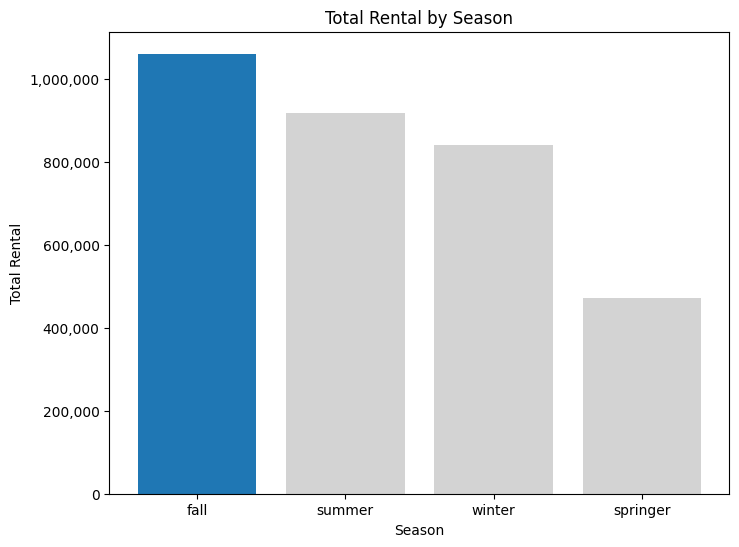

In [33]:
byseason_df=day_df.groupby(by="season")["total_rental"].sum().reset_index()
plt.figure(figsize=(8, 6))
color_palette = ['#1f77b4', '#D3D3D3', '#D3D3D3', '#D3D3D3']
plt.bar(x="season",
        height="total_rental",
        data=byseason_df.sort_values(by="total_rental", ascending=False),
        color=color_palette)
plt.xlabel("Season")
plt.ylabel("Total Rental")
plt.title("Total Rental by Season")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.show

**Insight:**
- total sewa sepeda terbanyak terjadi pada musim gugur, diikuti *summer*, *winter*, dan paling sedikit *springer*


**Pertanyaan 3** : Pada pukul berapa penyewaan sepeda terbanyak? Bagaimana perbandingan dari tahun 2011 ke 2012?

In [34]:
byhour2011_df=hour_df[hour_df['yr']==2011].groupby(by="hr")["total_rental"].sum().reset_index() #membuat pivot data by 'hr' tahun 2011

In [35]:
byhour2012_df=hour_df[hour_df['yr']==2012].groupby(by="hr")["total_rental"].sum().reset_index() #membuat pivot data by 'hr" tahun 2012

#### Membuat Line Cahrt untuk melihat pola penyewaan dalam jam
- `plt.figure(figsize=(8, 6))`: Membuat figur dengan ukuran lebar 8 inci dan tinggi 6 inci agar lebih proporsional.
- `plt.plot(x, y, marker='o', linestyle='-')`: Membuat grafik garis dengan:
    - `x = byhour2011_df["hr"]`: Sumbu-x mewakili jam.
    - `y = byhour2011_df["total_rental"]`: Sumbu-y mewakili total rental.
    - `marker='o'`: Setiap titik data (`jam`) ditandai dengan lingkaran.
    - `linestyle='-'`: Garis penghubung antar titik berbentuk garis lurus.
- `plt.xlabel("Hour")`: Memberikan label untuk sumbu-x (`jam`).
- `plt.ylabel("Total Rental")`: Memberikan label untuk sumbu-y (total rental).

- `plt.title("Total Rental by Hour")`: Memberikan judul untuk visualisasi.

Text(0.5, 1.0, 'Total Rental by Hour')

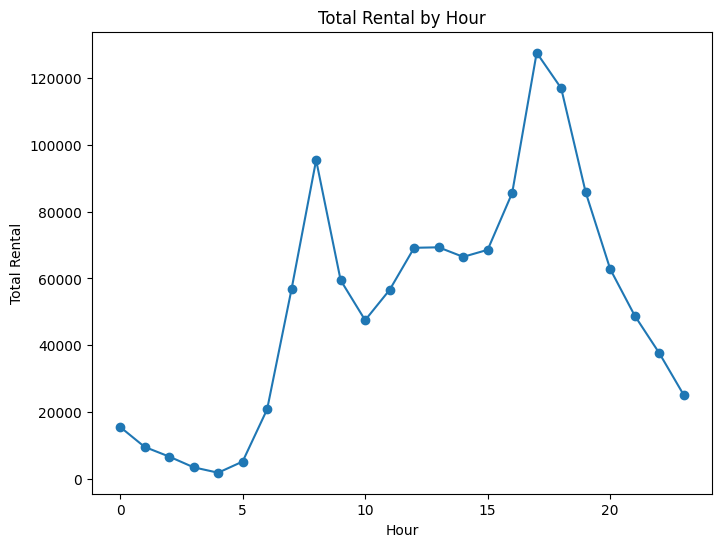

In [37]:
plt.figure(figsize=(8, 6))
plt.plot(byhour2011_df["hr"],
         byhour2011_df["total_rental"],
         marker='o',
         linestyle='-')
plt.xlabel("Hour")
plt.ylabel("Total Rental")
plt.title("Total Rental by Hour")

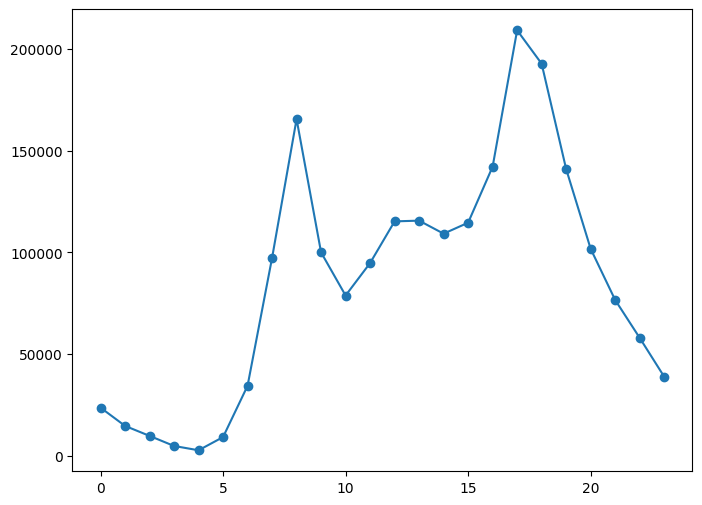

In [38]:
plt.figure(figsize=(8, 6))
plt.plot(byhour2012_df['hr'],
         byhour2012_df['total_rental'],
         marker='o',
         linestyle='-',
         )
plt.show()

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : Rata rata perbandingan penyewa casual dan penyewa terdaftar alias *registered* menunjukan bahwa penyewa *registered* selalu lebih banyak dari penyewa casual baik weekday ataupun weekend/holiday. Hal ini menunjukan loyality dari penyewa. Perusahaan penyewa tersebut bisa membuatkan program loyality kepada penyewa untuk lebih menarik pengguna casual sehingga tertarik untuk mendaftar
- Conclution pertanyaan  : penyewaan sepeda terbanyak terjadi pada musim semi, kedua terbanyak adalah musim panas, ketiga musim dingin dan paling sedikit terjadi pada musim semi. Berdasarkan insight tersebut perusahaan rental mungkin perlu lebih bekerja ekstra saat musim gugur dalam mengelola ketersediaan sepeda untuk di sewa, perawatan sepeda dan monitoring.